In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# 유방암 데이터 세트 준비하기

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
# 입력 데이터 확인하기

print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [3]:
# 처음 3개의 샘플을 출력해 보자

cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

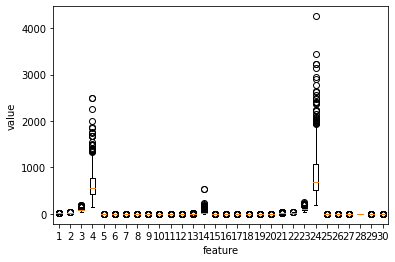

In [5]:
# 박스 플롯으로 특성의 사분위 관찰하기

plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

# 출력되는 그래프로 데이터를 전반적으로 살펴볼 수 있다 !
# 보면 4, 14, 24 번째 특성들이 다른 특성과 꽤 차이가 나는 것을 확인해 볼 수 있다 !

In [6]:
# 눈에 띄는 특성들 살펴보기

cancer.feature_names[[3, 13, 23]]

# 출력 결과를 보니 전부 넓이와 관련된 특성이라는 것을 확인할 수 있다.

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [7]:
# 타깃 데이터 확인하기

np.unique(cancer.target, return_counts=True)

# 출력 결과는 우선 cancer.target에는 0과 1값만 존재하고 && 0은 212개(음성클래스 즉 정상종양) 1은 357개(양성클래스 즉 악성종양) 존재함을 의미함 !

(array([0, 1]), array([212, 357], dtype=int64))

In [8]:
# 훈련 데이터 세트 저장하기

x = cancer.data
y = cancer.target

# 훈련데이터 세트 준비 완료 !

## 04-5 로지스틱 회귀로 모델을 만들어 보자 !

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# train_test_split() 으로 훈련 데이터 세트 나누기

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

# stratify = y : y에 들어있는 클래스 비율을 따르도록 
# test_size = 0.2 : 디폴트는 25%

In [11]:
# 잘 나눠졌는지 결과 확인하기

print(x_train.shape, x_test.shape)

(512, 30) (57, 30)


In [12]:
np.unique(y_train, return_counts = True)

(array([0, 1]), array([191, 321], dtype=int64))

### 로지스틱 회귀 구현하기

In [ ]:
class LogisticNeuron:

    def __init__(self):
        self.w = None
        self.b = None

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z

    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, 100, None)
        a = 1 / (1 + np.exp(-z))

    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.)